In [6]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.tripadvisor.com/Hotel_Review-g2665727-d150446-Reviews-The_Royal_Sonesta_San_Juan-Isla_Verde_Carolina_Puerto_Rico.html'
response = requests.get(url, headers={'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/109.0"})
soup = BeautifulSoup(response.text, 'html.parser')

In [7]:
#print(soup.prettify())

In [8]:
rev =soup.find_all('span',class_="QewHA H4 _a")
reviews = [review.text for review in rev]
reviews

['The hotel was beautiful and everything we needed was either in the hotel or nearby. Hilton was our room attendant. He was very welcoming,  courteous and checked on us often. We had a great vacation!!!',
 'Everything about this resort was perfect from the room to the ocean/pool view and private balcony to the bed and fluffy pillows .  The workers were accommodating and very polite and friendly! I gave 4 stars only because I was promised a free upgrade from the site I booked from but Royal Sonesta said they didn’t see that on their end and I wasn’t able to find email at time !  I was there to celebrate my daughter’s Sweet 16 bday so time didn’t allow till last day and by then it didn’t matter !  I can’t see how they could possibly upgrade what was already perfect and  pure paradise already but still ! I paid a fortune expecting that extra but it’s not in them but the booking site !  They did however surprise her with a complimentary beautiful piece of chocolate cake with strawberries a

In [10]:
page2 = 'https://www.tripadvisor.com/Hotel_Review-g2665727-d150446-Reviews-or10-The_Royal_Sonesta_San_Juan-Isla_Verde_Carolina_Puerto_Rico.html#REVIEWS'
page3 = 'https://www.tripadvisor.com/Hotel_Review-g2665727-d150446-Reviews-or20-The_Royal_Sonesta_San_Juan-Isla_Verde_Carolina_Puerto_Rico.html#REVIEWS'
#The difference between each page, aside from the first page, is 'or-multiple of 10-'

In [61]:
pages = []
def get_pages():
    pnum = 10
    while pnum%10 == 0 and pnum <=200:
        page = f'https://www.tripadvisor.com/Hotel_Review-g2665727-d150446-Reviews-or{pnum}-The_Royal_Sonesta_San_Juan-Isla_Verde_Carolina_Puerto_Rico.html#REVIEWS'
        pages.append(page)
        pnum +=10
    return pages

In [66]:
p = get_pages()

In [72]:
len(p)

40

In [75]:
e = []
for page in p:
    response = requests.get(page, headers={'User-Agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:109.0) Gecko/20100101 Firefox/109.0"})
    soup = BeautifulSoup(response.text, 'html.parser')
    review =soup.find_all('span',class_="QewHA H4 _a")
    for i in review:
        e.append(i.text)

In [76]:
e

['Over all our stay was amazing, the staff was so beyond helpful and a pleasure to deal with. The hotel was really empty because it was off season. My only complaint was the woman at the front desk who refused to give us late checkout even though the hotel was empty. She was extremely rude but all the other staff members were completely amazing',
 'Arrived early and was advised it would cost $120 for early check-in. Opted to wait by the pool for 3hrs which was fine.  The pool has lots of chairs, towels and umbrellas. The rooms were spacious, mini bar and frig.  Would leave the room in the morning for breakfast and arrive back after 3pm and the room was still not made.  For three days we just asked for fresh towels. A bit disappointed with the service.  The blow dryer needs to be updated to a better model. It took an hour to get my hair dry! The restaurant and gym were located near the beach, so if it was raining there is no way back without getting soaked.  The grounds are very pretty 

In [82]:
str_reviews = ''.join(e)

In [78]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fb/c8/9790df08b2685bf931e940fdf1207b39f394dc28b033c603f04d7e8da0cf/wordcloud-1.9.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached wordcloud-1.9.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (3.3 kB)
Using cached wordcloud-1.9.2-cp311-cp311-macosx_10_9_x86_64.whl (159 kB)
Note: you may need to restart the kernel to use updated packages.


In [80]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [81]:
stop = set(STOPWORDS)

In [113]:
hotel_stop = {'hotel','Sonesta','back','will','Royal','stay','us','Hilton','Jessica','right','find','already','resort',
             'definitely','want','stayed','still','Loved','things','day','Please','made','good','room','San Juan','got',
             'great','really','even','asked','sure','one','San','Juan','come','see','rooms','went'}

In [114]:
stop.update(hotel_stop)

In [115]:
word_cloud = WordCloud(stopwords=stop,background_color='white').generate(str_reviews)

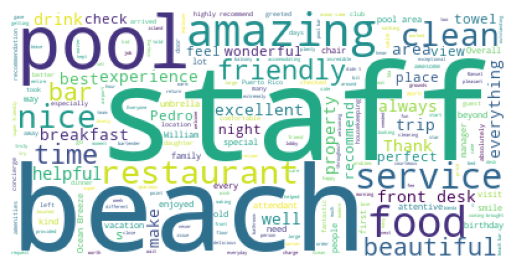

In [116]:
plt.imshow(word_cloud)
plt.axis('off')
plt.show()